# An Example Jupyter Notebook for Greylevel Analysis of Active Cathode Particles in X-ray CT tomograms 
Here we present a method for analysing the greylevel change in active cathode particles in their pristine state and after ageing. When aged Nickel Manganese Cobalt particles crack, resulting in changes in greylevel when imaged with X-ray CT. Typically, particles crack more in the center than at the surface. In this notebook we demonstrate how to use the GRAPES toolkit (`utils/GRAPES.py`) to analyse this phenomenon.

In [1]:
import tifffile as tiff
import numpy as np
import numpy.ma as ma
import pandas as pd
import os
os.chdir(os.path.dirname(os.getcwd()))
print(f"Correct Working Directory: {str(os.path.basename(os.getcwd()))=='battery_xct_notebooks'}")
%matplotlib widget
from utils.plotting_utils import view_axis0, view_axis0_with_labels
import utils.GRAPES as gp
from IPython.display import display

Correct Working Directory: True


First we explore the dataset. We can scroll through the original data and particle masks using the widgets below.

In [2]:
pristine_intensity = tiff.imread('data/prist_gl.tif')
pristine_labels = tiff.imread('data/prist_lbl.tif')

slider = view_axis0_with_labels(pristine_intensity, pristine_labels)
display(slider)

In [3]:
aged_intensity = tiff.imread('data/charge_gl.tif')
aged_labels = tiff.imread('data/charge_lbl.tif')

slider1 = view_axis0_with_labels(aged_intensity, aged_labels)
display(slider1)

The particle segmentations were achieved using `skimage.segmentation.watershed` with a smoothed distance map. The segmentation workflow is excluded, but is available from the authors on request.

Using the `GRAPES` toolkit we can calculate a dataframe of particles and particle properties. The GRAPES toolkit has been previously discussed in a paper [here](https://onlinelibrary.wiley.com/doi/full/10.1002/smtd.202500082).

In [4]:
pristine_df = gp.GRAPES(pristine_labels, pristine_intensity)
aged_df = gp.GRAPES(aged_labels, aged_intensity)

In [5]:
pristine_df.head()

,label,volume,centroid-0,centroid-1,centroid-2,centroid_local-0,centroid_local-1,centroid_local-2,equivalent_diameter_volume,intensity_max,intensity_mean,intensity_min,image,image_intensity,sphericity,radial_layers,radial_layers_graylevel,radial_layers_graylevelnormed,radial_layers_dt
0,9324,6.0,0.000000,204.166667,210.666667,0.000000,1.166667,1.666667,2.254503,159.0,151.833333,142.0,"[[[False, False, True, True], [False, False, T...","[[[0, 0, 152, 153], [0, 0, 142, 0], [154, 159,...",15.968040,[1],[151.83333],[0.0],"[[[0, 0, 1, 1], [0, 0, 1, 0], [1, 1, 1, 0]]]"
1,9397,1426.0,1.549790,40.862553,170.908836,1.549790,17.862553,7.908836,13.964979,187.0,153.324684,129.0,"[[[False, False, False, False, False, False, F...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 139, 141, 140, 1...",612.675445,"[1, 2, 3, 4]","[150.79355, 159.12122, 168.5303, 172.63637]","[0.0, 0.38125423, 0.8120177, 1.0]","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0..."
2,9406,1674.0,1.064516,188.311231,155.945042,1.064516,19.311231,11.945042,14.731680,189.0,155.511947,135.0,"[[[False, False, False, False, False, False, F...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 135, 144, 142...",681.795965,"[1, 2]","[153.30493, 162.14354]","[0.0, 1.0]","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0..."
3,9532,334.0,0.562874,188.137725,250.886228,0.562874,19.137725,5.886228,8.608271,178.0,149.377246,135.0,"[[[False, False, False, False, True, True, Tru...","[[[0, 0, 0, 0, 144, 148, 145, 148, 137, 138], ...",232.799353,"[1, 2]","[149.29395, 156.25]","[0.0, 1.0]","[[[0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0,..."
4,9549,68.0,0.014706,135.632353,88.117647,0.014706,4.632353,3.117647,5.064113,166.0,146.367647,134.0,"[[[False, False, True, True, True, True, True]...","[[[0, 0, 153, 150, 137, 137, 138], [0, 144, 14...",80.566915,[1],[146.36765],[0.0],"[[[0, 0, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1]..."


We can now reduce the data into volume quartiles 

In [6]:
pristine_qdf = gp.radial_layers_quartiles(pristine_df, prop = 'volume')
charged_qdf = gp.radial_layers_quartiles(aged_df, prop = 'volume')

We can now plot the mean normalised greylevel value in radial layers averaged across all the particles in the dataset. We see that the particles at the surface are brighter, this is due to a phase contrast effect. 

c:\Users\matti\Downloads\battery_xct_notebooks\utils\GRAPES.py:596: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax.errorbar(


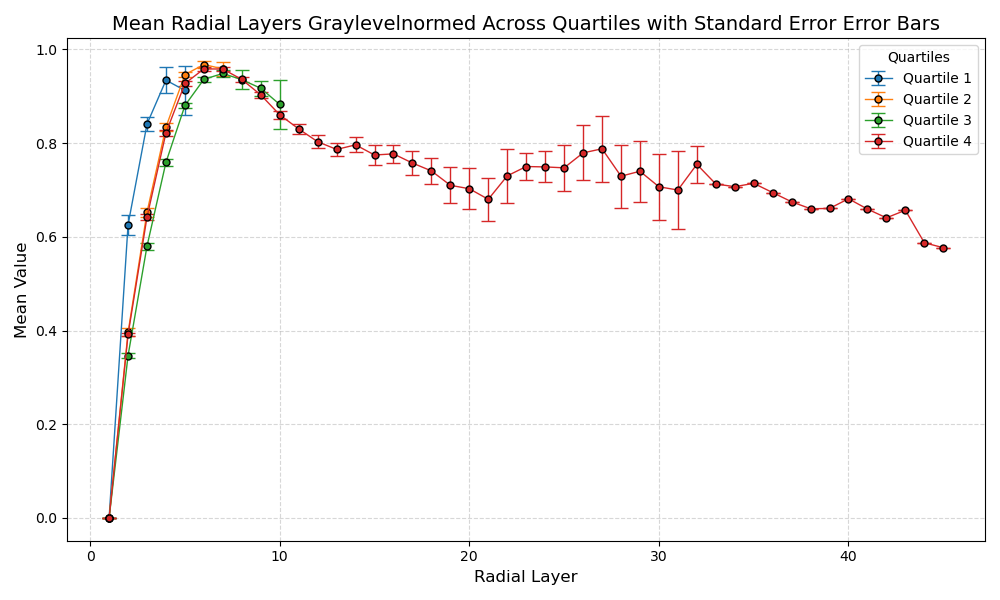

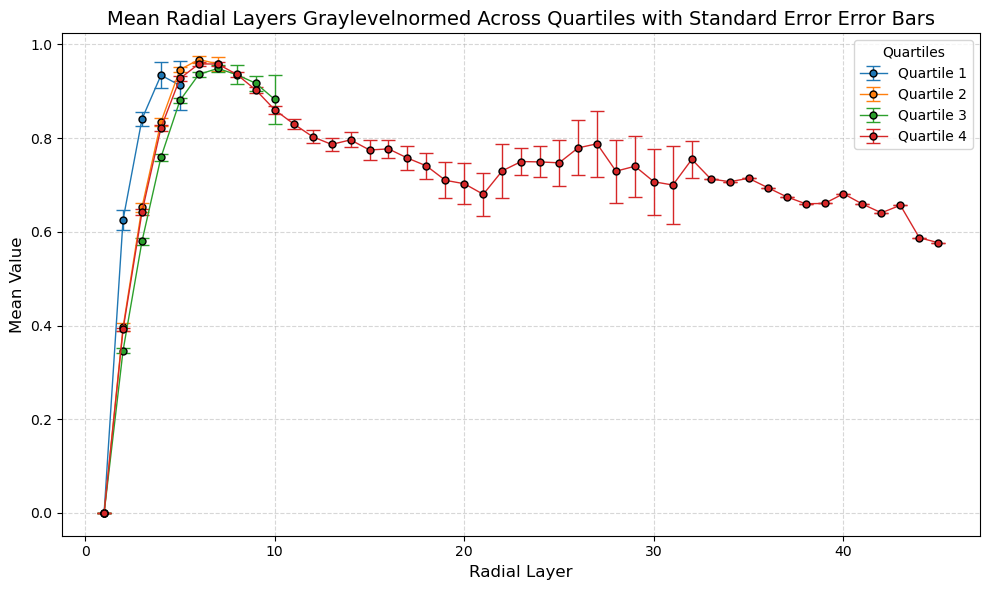

In [7]:
gp.plot_quartile_radial_layers(pristine_qdf, prop = 'radial_layers_graylevelnormed')

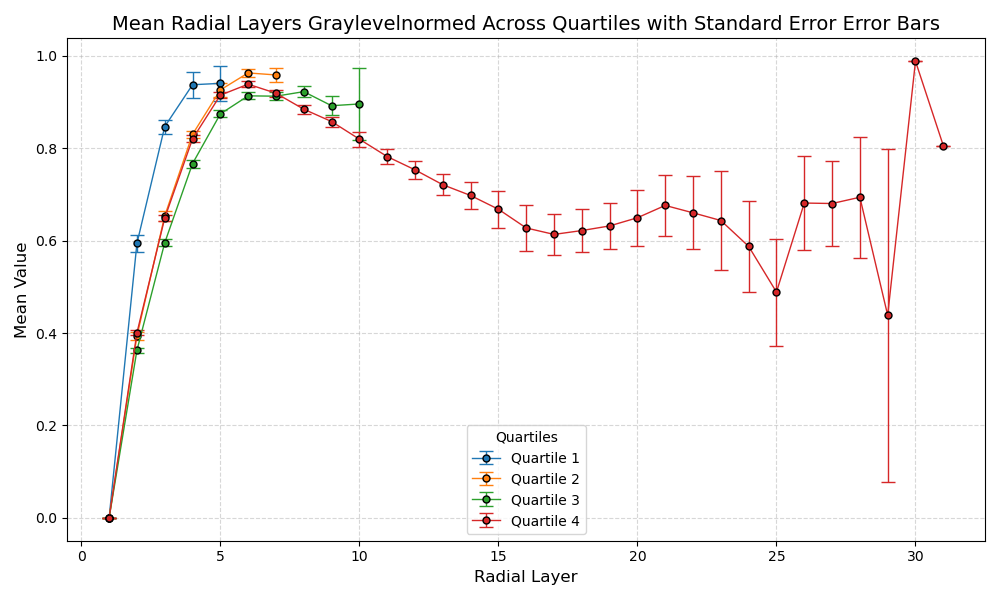

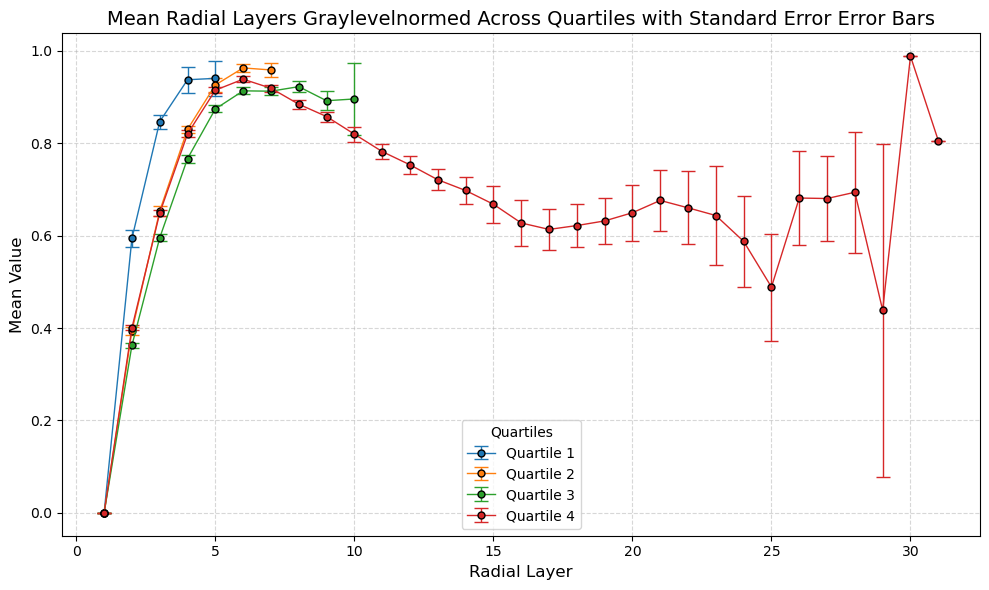

In [8]:
gp.plot_quartile_radial_layers(charged_qdf, prop = 'radial_layers_graylevelnormed')

By comparing the plots for `pristine_intensity' vs 'aged_intensity', we can see that the aged particles had lower intensities on average in the centers of the particles. This is characteristic of the cracking that occurs during ageing. 

Next we demonstrate how the `GRAPES` toolkit can be used visualise the distribution of a property in space. Using the `props_2_image` we can replot a property from the dataframe in image space. This is demosntrated below for 'intensity_mean' of each particle.

In the plot below we suggest choosing the `viridis` colormap and moving the 'range' slider up so that the intensity difference is viewable.

c:\Users\matti\Downloads\battery_xct_notebooks\utils\GRAPES.py:1141: UserWarning: The following labels in the image are not present in the dataframe and will be assigned 0: [0]
  warnings.warn(f"The following labels in the image are not present in the dataframe and will be assigned 0: {labels_not_in_mapping}")
c:\Users\matti\Downloads\battery_xct_notebooks\utils\GRAPES.py:1212: UserWarning: 'slice_idx' not provided. Using central slice index 127.
  warnings.warn(f"'slice_idx' not provided. Using central slice index {slice_idx}.")


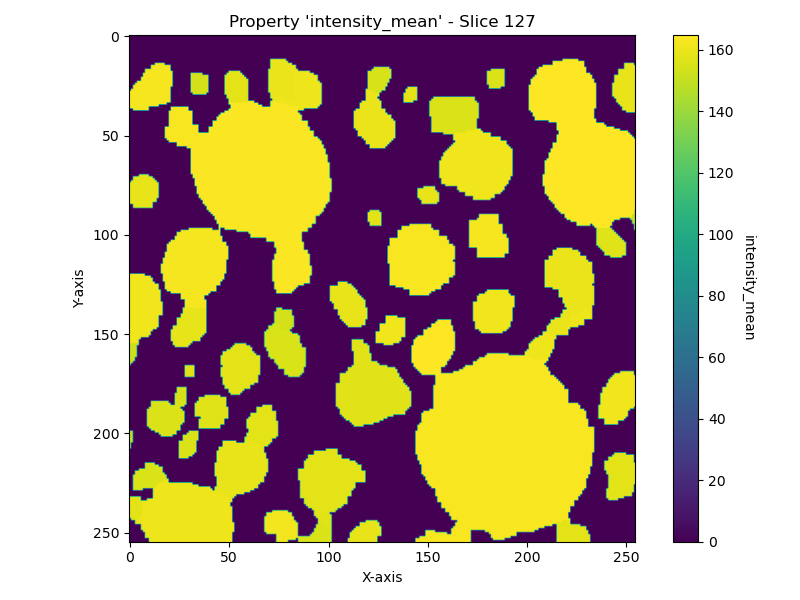

In [9]:
pristine_mean_int = gp.prop_2_image(pristine_labels, pristine_df, prop = 'intensity_mean')
slider2 = view_axis0(ma.masked_where(pristine_mean_int == 0, pristine_mean_int).data)
display(slider2)

c:\Users\matti\Downloads\battery_xct_notebooks\utils\GRAPES.py:1141: UserWarning: The following labels in the image are not present in the dataframe and will be assigned 0: [0]
  warnings.warn(f"The following labels in the image are not present in the dataframe and will be assigned 0: {labels_not_in_mapping}")
c:\Users\matti\Downloads\battery_xct_notebooks\utils\GRAPES.py:1212: UserWarning: 'slice_idx' not provided. Using central slice index 127.
  warnings.warn(f"'slice_idx' not provided. Using central slice index {slice_idx}.")


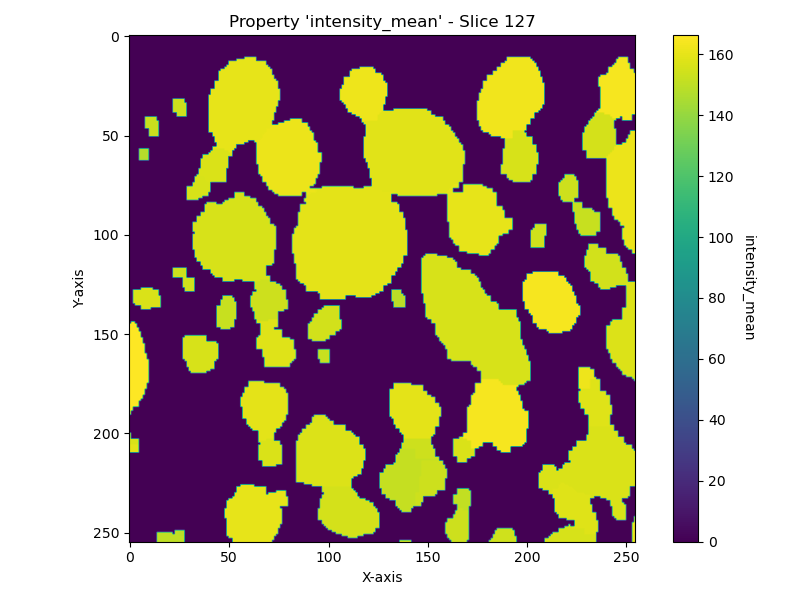

In [11]:
charged_mean_int = gp.prop_2_image(aged_labels, aged_df, prop = 'intensity_mean')
slider3 = view_axis0(charged_mean_int)
display(slider3)

### Conclusion
The `GRAPES` toolkit can be used characterize greylevel change and other particle level characteristics in X-ray CT datasets of particles. In this case relatively small 256 x 256 x 256 volumes were used, however, this method works best with larger volumes. For a more detailed description of the electrochemical imaging use-case see this [paper](https://onlinelibrary.wiley.com/doi/full/10.1002/smtd.202500082).